<a href="https://colab.research.google.com/github/roopamrv/Sparks_Foundation_Intern/blob/main/Task1_version02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *THE SPARKS FOUNDATION*

Prediction Using Supervised ML

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Information of loaded data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [16]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


Assigning values to variables 

In [15]:
x = data["Hours"].values.reshape(-1,1)
y = data["Scores"].values

Plotting graph between Hours and Scores

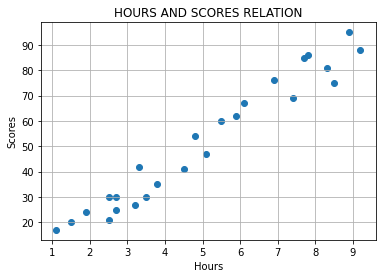

In [22]:
plt.scatter(x,y)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("HOURS AND SCORES RELATION")
plt.grid()
plt.show()

Linear Relation between Hours and Scores

Splitting Data in to train and test sets





In [24]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.40,random_state = 0)

In [31]:
print("x_train data \n",x_train)
print("x_test data \n",x_test)
print("y train data \n",y_train)
print("y test data \n",y_test)

x_train data 
 [[5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
x_test data 
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]]
y train data 
 [47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
y test data 
 [20 27 69 30 62 35 24 86 76 17]


Applying Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
linreg = LinearRegression()

In [34]:
linreg.fit(x_train, y_train)

LinearRegression()

In [37]:
line = linreg.coef_ * x + linreg.intercept_
line

array([[25.84551793],
       [51.57968389],
       [32.77394723],
       [85.23205475],
       [35.74327407],
       [15.9477618 ],
       [92.16048404],
       [55.53878634],
       [83.25250352],
       [27.82506916],
       [77.31384984],
       [59.49788879],
       [45.6410302 ],
       [33.76372284],
       [11.98865934],
       [89.1911572 ],
       [25.84551793],
       [19.90686425],
       [61.47744002],
       [74.344523  ],
       [27.82506916],
       [48.61035704],
       [38.71260091],
       [69.39564493],
       [78.30362545]])

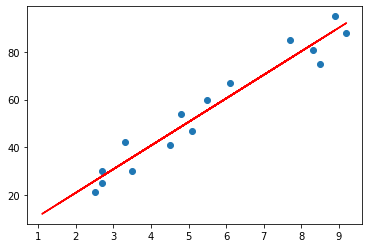

In [39]:
plt.scatter(x_train, y_train)
plt.plot(x,line , color = 'red')
plt.show()

In [40]:
y_pred = linreg.predict(x_test)
y_pred

array([15.9477618 , 32.77394723, 74.344523  , 25.84551793, 59.49788879,
       38.71260091, 19.90686425, 78.30362545, 69.39564493, 11.98865934])

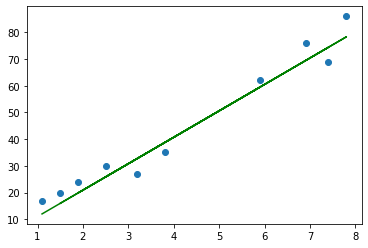

In [42]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred, color = "green")
plt.show()

# Data Prediction

In [51]:
data_predict = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0],'Actual-Score': y_test.reshape(1,-1)[0],'Prediction': y_pred.reshape(1,-1)[0]})

In [52]:
data_predict

,Hours,Actual-Score,Prediction
0,1.5,20,15.947762
1,3.2,27,32.773947
2,7.4,69,74.344523
3,2.5,30,25.845518
4,5.9,62,59.497889
5,3.8,35,38.712601
6,1.9,24,19.906864
7,7.8,86,78.303625
8,6.9,76,69.395645
9,1.1,17,11.988659


In [60]:
sorted_data = data_predict.sort_values(by='Hours')

Graph Plotting between Actual and Predicted Scores

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


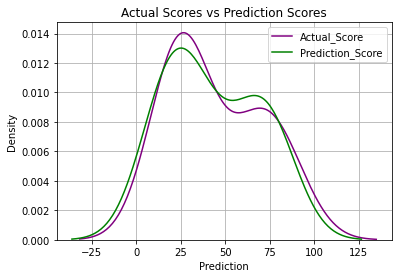

In [68]:
plt.title("Actual Scores vs Prediction Scores")
plt1 = sns.distplot(sorted_data['Actual-Score'], hist = False, color = "purple", label = 'Actual_Score')
sns.distplot(sorted_data['Prediction'], hist = False, color = 'green', label = 'Prediction_Score',ax = plt1)
plt.legend()
plt.grid()

Calculating error, correlation and accuracy of our model

In [71]:
from sklearn.metrics import r2_score
from sklearn import metrics


mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :", mae)

corr = r2_score(y_train, linreg.predict(x_train))
print("Correlation :", corr)

accuracy = r2_score(y_test,y_pred)
print("Accuracy :", accuracy)


Mean Absolute Error : 4.8945108634106065
Correlation : 0.9440108159733135
Accuracy : 0.956640847232559


Calculating Predicted score if a student sudies 9.25hrs/day

In [75]:
hrs = 9.25
prediction = linreg.predict([[hrs]])
print("If a student sudies 9.25hrs/day then predicted score will be :",prediction)

If a student sudies 9.25hrs/day then predicted score will be : [92.65537185]
